In [1]:
# importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the csv file in DataFrame - diabetes_df
diabetes_df = pd.read_csv('diabetes.csv')

In [3]:
# getting the feel of the data
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# checking some preliminary information about the data set so that we know if we need to change any data 
# type in the following analysis
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# understanding the statistics of the data
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# making the target variable categorical as it was numeric
diabetes_df['Outcome'] = diabetes_df['Outcome'].astype('category')

In [7]:
# verifying the change of data type for Outcome column
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [8]:
# setting the style of visualizations
sns.set_style('whitegrid')

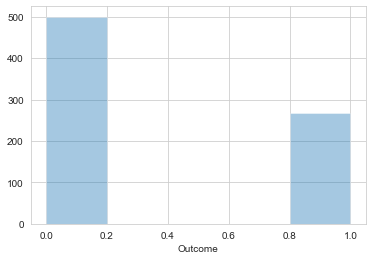

In [9]:
# checking the distribution. here we can clearly see that we have more 0's or no diabetes than the 1's. 
# This also suggestes that the data is biased which means that the model will not be 100% accurate
sns.distplot(diabetes_df['Outcome'],kde=False)

C:\Users\skulk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\skulk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


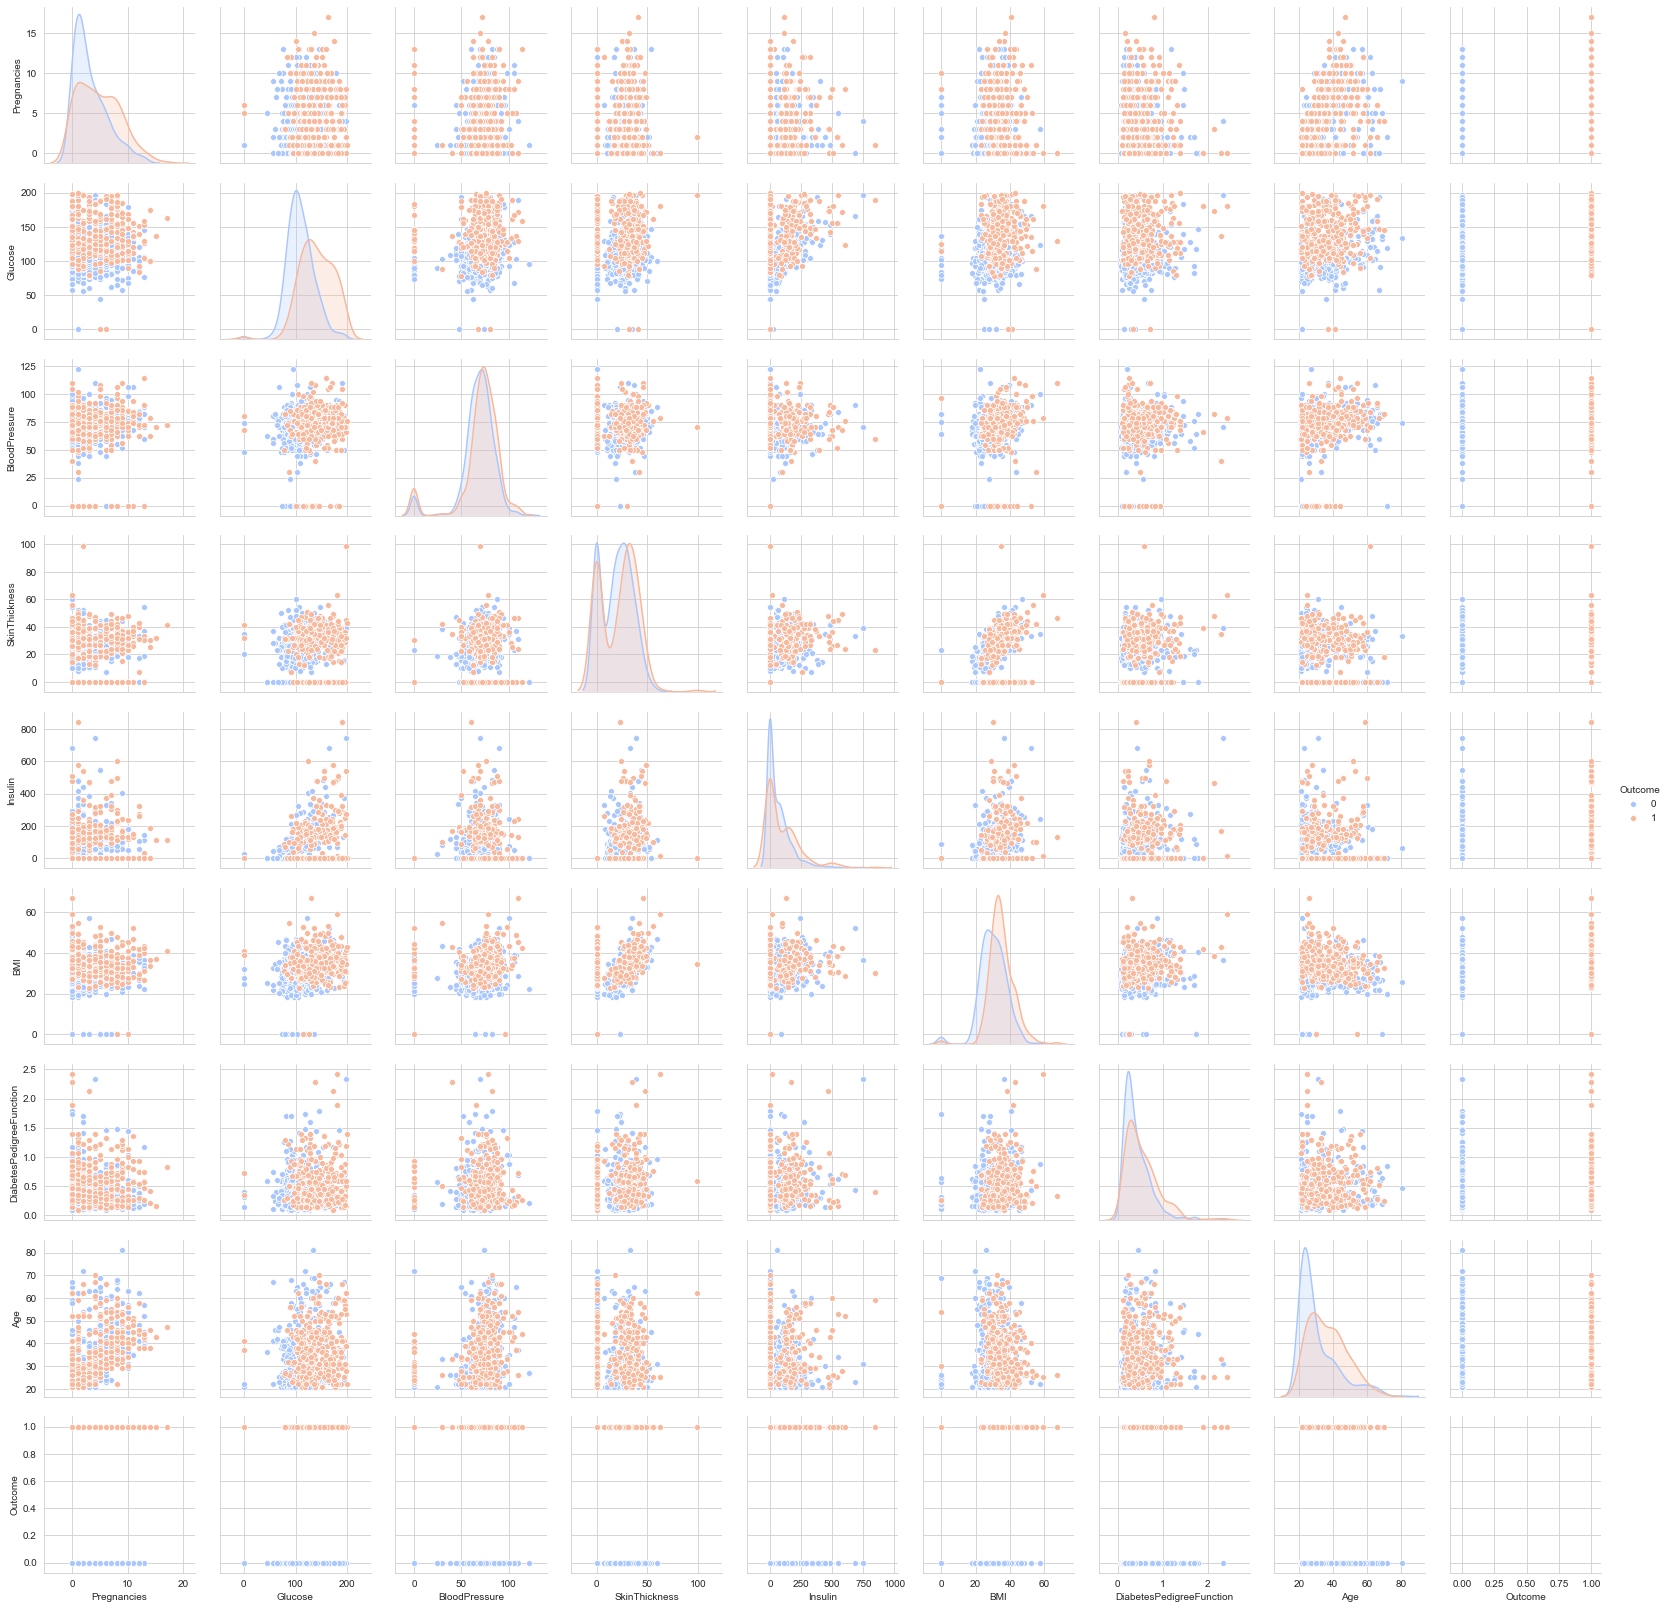

In [10]:
# understanding the distribution and dependacy of data based on the Outcome column
sns.pairplot(diabetes_df, hue='Outcome',palette='coolwarm')

In [11]:
# we can clearly see that there is a clear impact of Age and Glucose on the Outcome column. 
# For other columns we can not deduce anything of this nature.
# below we will see the impact of Age and Glucose on the Outcome column.

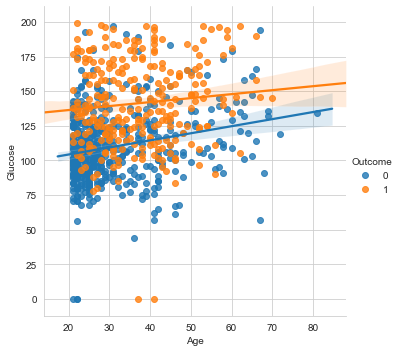

In [12]:
# from this distrubition we can clearly see that for the patients who have diabetes have high glucose in their blood
# Age is not an impactful column
sns.lmplot(x='Age',y='Glucose',data=diabetes_df,hue='Outcome')

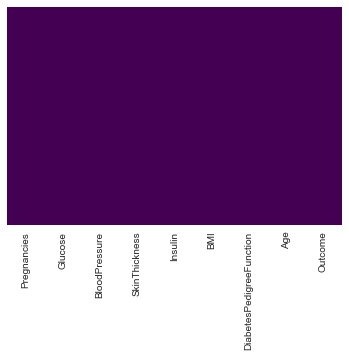

In [13]:
# checking for null values before we begin the analysis. 
# Since there are no yellow rows/columns we can say that our data has no missing values and is ready for further analysis.
sns.heatmap(diabetes_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# importing model_selection from sklearn to easily split train and test data
from sklearn.model_selection import train_test_split

In [15]:
# X is the data set without the target variable and y is with the target variable
# After that we have split the data in train and test X_train, X_test, y_train, y_test with and without the target variable 

X = diabetes_df.drop(['Outcome'],axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [16]:
# importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [17]:
# instatiating the LogisticRegression
logReg = LogisticRegression()

In [18]:
# fitting the LogisticRegression model on the train data set
logReg.fit(X_train,y_train)

C:\Users\skulk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# predicting the LogisticRegression model on the test data set
logRegpredictions = logReg.predict(X_test)

In [20]:
# importing classification_report,confusion_matrix from sklearn
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
# checking the classification_report
print(classification_report(y_test,logRegpredictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       167
           1       0.73      0.59      0.65        87

    accuracy                           0.78       254
   macro avg       0.77      0.74      0.75       254
weighted avg       0.78      0.78      0.78       254



In [22]:
# checking the confusion_matrix
print(confusion_matrix(y_test,logRegpredictions))

[[148  19]
 [ 36  51]]


In [66]:
# Understanding the confusion_matrix
LogReg_confustionMatrix = pd.DataFrame(
    confusion_matrix(y_test, logRegpredictions, labels=[1,0]), 
    index=['true:1', 'true:0'], 
    columns=['pred:1', 'pred:0']
)
print(LogReg_confustionMatrix)

        pred:1  pred:0
true:1      51      36
true:0      19     148


In [23]:
# importing RandomForestClassifier from sklearn
# instatiating the RandomForestClassifier with 50 estimators
# fitting the RandomForestClassifier model on the train data set

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
# predicting the RandomForestClassifier model on the test data set
rfc_pred = rfc.predict(X_test)

In [25]:
# checking the confusion_matrix
print(confusion_matrix(y_test,rfc_pred))

[[136  31]
 [ 37  50]]


In [65]:
# Understanding the confusion_matrix
RFC_confustionMatrix = pd.DataFrame(
    confusion_matrix(y_test, rfc_pred, labels=[1,0]), 
    index=['true:1', 'true:0'], 
    columns=['pred:1', 'pred:0']
)
print(RFC_confustionMatrix)

        pred:1  pred:0
true:1      50      37
true:0      31     136


In [26]:
# checking the classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       167
           1       0.62      0.57      0.60        87

    accuracy                           0.73       254
   macro avg       0.70      0.69      0.70       254
weighted avg       0.73      0.73      0.73       254



In [27]:
# to prevent the model from overfitting and predicting accurately for any test data set let us set the below factors
#1. We will set max depth to 25. This ensures that branching stops after 25th branching, otherwise each sample may have its branch and overfit.
#2. We will use min_samples_split as 3. The default value is 2. This means that each internal node will split as long as it has a minimum of two sample. We dont want that!

rfc_fe = RandomForestClassifier(n_estimators=50, max_depth = 25, min_samples_split = 3)
rfc_fe.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
# predicting the RandomForestClassifier model on the test data set
rfc_fe_pred = rfc_fe.predict(X_test)

In [29]:
# checking the confusion_matrix
print(confusion_matrix(y_test,rfc_fe_pred))

[[135  32]
 [ 31  56]]


In [64]:
# Understanding the confusion_matrix
RFC_FE_confustionMatrix = pd.DataFrame(
    confusion_matrix(y_test, rfc_fe_pred, labels=[1,0]), 
    index=['true:1', 'true:0'], 
    columns=['pred:1', 'pred:0']
)
print(RFC_FE_confustionMatrix)

        pred:1  pred:0
true:1      56      31
true:0      32     135


In [30]:
# checking the classification_report
print(classification_report(y_test,rfc_fe_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       167
           1       0.64      0.64      0.64        87

    accuracy                           0.75       254
   macro avg       0.72      0.73      0.73       254
weighted avg       0.75      0.75      0.75       254



In [31]:
# To find best values for the RF parameters, let us use cross validation
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 7, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [32]:
print(rm_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [2, 3, 5, 7, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]}


In [33]:
rf2 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = rm_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf2_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    4.2s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.5s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [34]:
# Here we can Best parameters for the best model
rf2_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 32,
 'bootstrap': True}

In [35]:
# instantiating the model with the best parameters using CV
rfc_best_params = RandomForestClassifier(n_estimators = 10, min_samples_leaf = 2, min_samples_split = 3, max_depth = 32,
                                         bootstrap = True, max_features = 'auto')

In [36]:
# fitting the model with the best parameters using CV
rfc_best_params.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=32, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
# prediting the model with the best parameters using CV
rfc_best_params_pred = rfc_best_params.predict(X_test)

In [38]:
# checking the confusion_matrix
print(confusion_matrix(y_test,rfc_best_params_pred))

[[134  33]
 [ 36  51]]


In [63]:
# Understanding the confusion_matrix
RFC_BP_confustionMatrix = pd.DataFrame(
    confusion_matrix(y_test, rfc_best_params_pred, labels=[1,0]), 
    index=['true:1', 'true:0'], 
    columns=['pred:1', 'pred:0']
)
print(RFC_BP_confustionMatrix)

        pred:1  pred:0
true:1      51      36
true:0      33     134


In [39]:
# checking the classification_report
print(classification_report(y_test,rfc_best_params_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       167
           1       0.61      0.59      0.60        87

    accuracy                           0.73       254
   macro avg       0.70      0.69      0.70       254
weighted avg       0.73      0.73      0.73       254



In [40]:
# importing Support Vector Classifier from sklearn
from sklearn.svm import SVC

In [41]:
# instatiating SVC without setting any parameters. This model is going to perform terribly
model = SVC()

In [42]:
# fitting the default SVC model
model.fit(X_train,y_train)

C:\Users\skulk\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
# predicting the default SVC model
SVCpredictions = model.predict(X_test)

In [44]:
# checking the confusion_matrix. as mentioned earlier, this model performed terribly
print(confusion_matrix(y_test,SVCpredictions))

[[167   0]
 [ 87   0]]


In [61]:
# Understanding the confusion_matrix
SVC_confustionMatrix = pd.DataFrame(
    confusion_matrix(y_test, SVCpredictions, labels=[1,0]), 
    index=['true:1', 'true:0'], 
    columns=['pred:1', 'pred:0']
)
print(SVC_confustionMatrix)

        pred:1  pred:0
true:1       0      87
true:0       0     167


In [46]:
# checking the classification_report. as mentioned earlier, this model performed terribly
print(classification_report(y_test,SVCpredictions))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       167
           1       0.00      0.00      0.00        87

    accuracy                           0.66       254
   macro avg       0.33      0.50      0.40       254
weighted avg       0.43      0.66      0.52       254



C:\Users\skulk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
# selecting best parameters for the SVC
param_grid = {'C': [0.01,0.1,0.05,1,3, 5, 7, 10,12,15,17,20,50,70, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001,0.0002,0.0003,0.0005,0.0007,0.00001], 'kernel': ['rbf']} 

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# instatiating the SVC to find best parameters for the SVC
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,n_jobs=-1)

In [50]:
# fitting the SVC to find best parameters for the SVC
grid.fit(X_train,y_train)

C:\Users\skulk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    2.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.05, 1, 3, 5, 7, 10, 12, 15, 17, 20,
                               50, 70, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.0002, 0.0003,
                                   0.0005, 0.0007, 1e-05],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [51]:
grid.best_params_

{'C': 17, 'gamma': 1e-05, 'kernel': 'rbf'}

In [52]:
grid.best_estimator_

SVC(C=17, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
# predicting off the best SVC parameters
grid_predictions = grid.predict(X_test)

In [58]:
# checking the confusion_matrix. and we can now see massive improvement from the earlier SVC
print(confusion_matrix(y_test,grid_predictions))

[[148  19]
 [ 39  48]]


In [60]:
# Understanding the confusion_matrix
grid_confustionMatrix = pd.DataFrame(
    confusion_matrix(y_test, grid_predictions, labels=[1,0]), 
    index=['true:1', 'true:0'], 
    columns=['pred:1', 'pred:0']
)
print(grid_confustionMatrix)

        pred:1  pred:0
true:1      48      39
true:0      19     148


In [55]:
# checking the classification_report. and we can now see massive improvement from the earlier SVC
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       167
           1       0.72      0.55      0.62        87

    accuracy                           0.77       254
   macro avg       0.75      0.72      0.73       254
weighted avg       0.77      0.77      0.76       254



In [99]:
# from all the above models we have establish which is the best ML model.
# here, we will have to establish some baselines
# for starters, let us say that the model is only inaccurate when it is predicting NO DIABETES when the person does HAVE DIABETES
# because it is all right if a patient does not have diabetes but predicts it has and then the patient can undergo additional tests to be sure
sdf = pd.DataFrame(
{'Model Type':['Logistic Regression','Random Forest Classifier with default parameters',
              'Random Forest Classifier with some tweeking', 'Random Forest Classifier with best parameters',
              'Support Vector Classifier with default parameters','Support Vector Classifier with best parameters'],
 'False Prediction':[36,37,31,36,87,39],
 'Total values':[254,254,254,254,254,254],
'F-1 Score':[0.78,0.73,0.75,0.73,0.52,0.76]})

sdf['Accuracy'] = (1-sdf['False Prediction']/sdf['Total values'])

sdf

,Model Type,False Prediction,Total values,F-1 Score,Accuracy
0,Logistic Regression,36,254,0.78,0.858268
1,Random Forest Classifier with default parameters,37,254,0.73,0.854331
2,Random Forest Classifier with some tweeking,31,254,0.75,0.877953
3,Random Forest Classifier with best parameters,36,254,0.73,0.858268
4,Support Vector Classifier with default parameters,87,254,0.52,0.657480
5,Support Vector Classifier with best parameters,39,254,0.76,0.846457


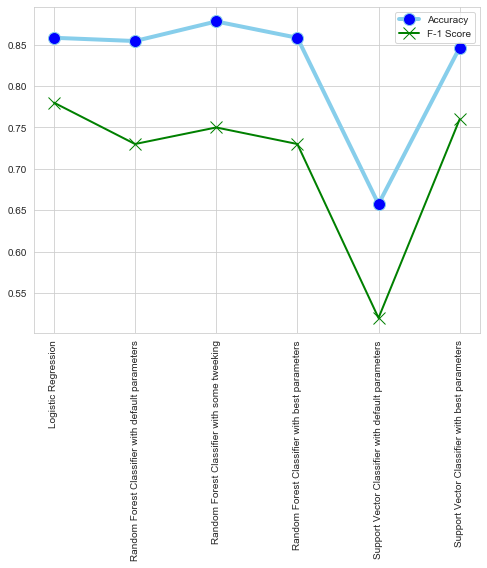

In [121]:
# visually showing the above so it is easy to understand which ML model will work better 
plt.figure(figsize=(8,6))
plt.plot('Model Type','Accuracy',markerfacecolor='blue',marker='o', markersize=12, color='skyblue', linewidth=4,data=sdf)
plt.plot('Model Type','F-1 Score',markerfacecolor='green',marker='x', markersize=12, color='green', linewidth=2,data=sdf)
plt.xticks(rotation=90)
plt.legend()

From the above graph, it is very much clear that Logistic Regression or Random Forest Classifier with some tweeking will work the best for this data as it has high accuracy along with high F-1 Score. While, the Support Vector Classifier with default parameters performs the worst!